<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing(Blurring and gray scaling) & Edge detection with Canny detection method

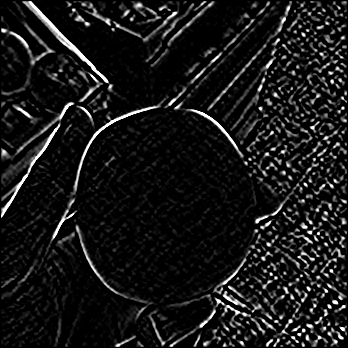

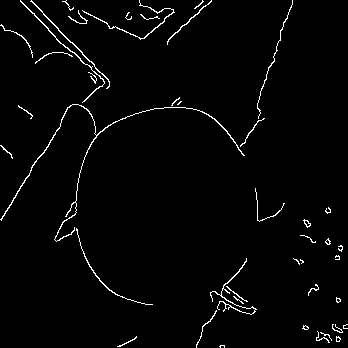

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
# Read the original image
img = cv2.imread('/content/Golden-Delicious_001.jpg') 
# org_img = cv2.imread("/content/Alpro-Blueberry-Soyghurt_002.jpg")
# img = result
# Display original image
# cv2_imshow(img)
# cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
# cv2_imshow(sobelx)
# cv2.waitKey(0)
# cv2_imshow(sobely)
# cv2.waitKey(0)
cv2_imshow(sobelxy)
# cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges)
# cv2.waitKey(0)
 
# cv2.destroyAllWindows()

# Identifying contours with the helpf of edge detection method

In [2]:
def contourGetter(gray, img):
    # img = cv2.imread("Golden-Delicous_031.jpg")
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and find the bounding box
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

    # Draw the bounding box on the image
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes 
    cv2_imshow(img)

In [3]:
import matplotlib.pyplot as plt


# Getting found bounding boxes and draw them into image with shape of rectangle


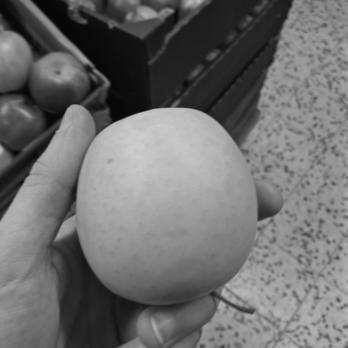

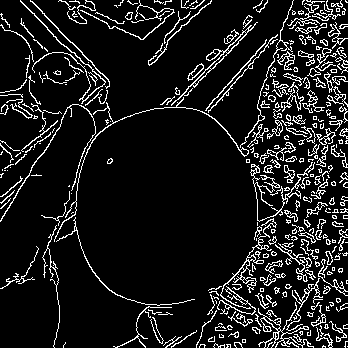

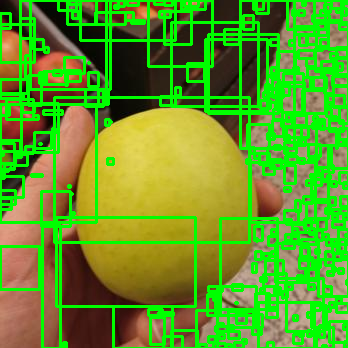

In [4]:
from PIL import Image
# im = cv2.imread("/content/moxito.jpg")


def edge_detection(image_path):
    # Read the image
    # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=30, threshold2=100)

    # Display the original image and the edges
    cv2_imshow(image)
    cv2_imshow(edges)
    return edges
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
# image_file = 'path/to/image.jpg'
contourGetter(edge_detection(img), img)


# Getting and drawing bounding boxes using three main process of image which are contrast, normalized image and blurred

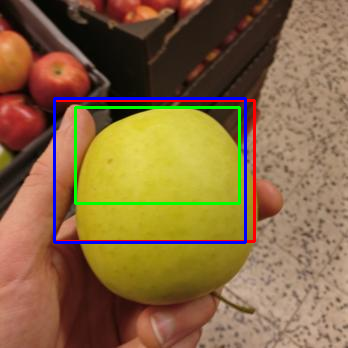

In [5]:
import cv2
import numpy as np

def preprocess_image(image):
    # Normalize pixels
    
    normalized_image = image.astype(np.float32) / 2.50
    gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
    # Apply high contrast transformation
    R, G, B = cv2.split(image)

    output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)

    contrast_image = cv2.merge((output1_R, output1_G, output1_B))

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    return normalized_image, contrast_image, blurred_image

def find_max_bounding_boxes(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image= gray_image.astype(np.uint8)
    # Perform edge detection
    edges = cv2.Canny(gray_image, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the maximum bounding box
    max_area = 0
    max_bbox = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > max_area:
            max_area = area
            max_bbox = (x, y, x + w, y + h)

    return max_bbox

# Load the image
image = cv2.imread('/content/Golden-Delicious_001.jpg')

# Preprocess the image
normalized_image, contrast_image, blurred_image = preprocess_image(image)

# Find maximum bounding boxes
bbox_normalized = find_max_bounding_boxes(normalized_image)
bbox_contrast = find_max_bounding_boxes(contrast_image)
bbox_blurred = find_max_bounding_boxes(blurred_image)

# Draw bounding boxes on the original image
cv2.rectangle(image, (bbox_normalized[0], bbox_normalized[1]), (bbox_normalized[2], bbox_normalized[3]), (0, 255, 0), 2)
cv2.rectangle(image, (bbox_contrast[0], bbox_contrast[1]), (bbox_contrast[2], bbox_contrast[3]), (0, 0, 255), 2)
cv2.rectangle(image, (bbox_blurred[0], bbox_blurred[1]), (bbox_blurred[2], bbox_blurred[3]), (255, 0, 0), 2)

# Display the image
cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


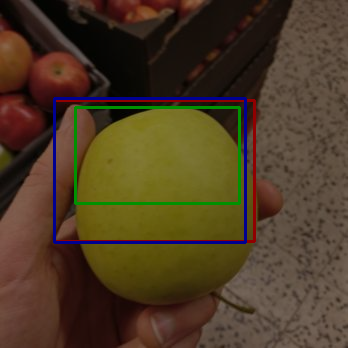

In [6]:
cv2_imshow(image.astype(np.float32)/1.75)

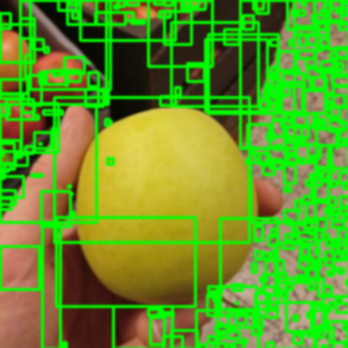

In [7]:
cv2_imshow(preprocess_image(img)[2])

# Image segmentation to classify each region of image by its similar pixels 

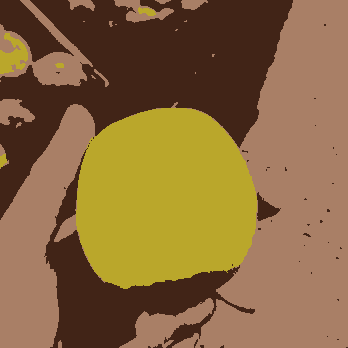

In [8]:
import cv2
import numpy as np

def segment_image(image, num_clusters):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Convert the pixels to float type
    pixels = np.float32(pixels)

    # Define criteria and apply K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)
    _, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the centers to 8-bit integer type
    centers = np.uint8(centers)

    # Reshape the labels to the original image shape
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

# Load the image
image = cv2.imread("/content/Golden-Delicious_001.jpg")

# Perform image segmentation with 3 clusters
segmented_image = segment_image(image, num_clusters=3)

# Display the original and segmented images
# cv2.imshow('Original Image', image)
cv2_imshow(segmented_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


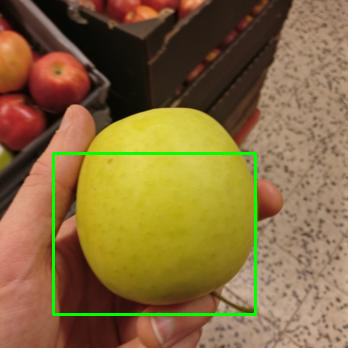

In [9]:
bbox_normalized = find_max_bounding_boxes(segmented_image)
cv2.rectangle(image, (bbox_normalized[0], bbox_normalized[1]), (bbox_normalized[2], bbox_normalized[3]), (0, 255, 0), 2)
cv2_imshow(image)

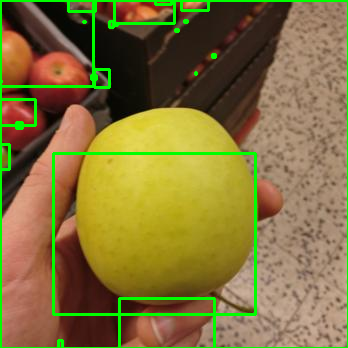

In [10]:
import cv2
import numpy as np

def preprocess_image(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixels
    normalized_image = gray_image.astype(np.float32) / 255.0

    # Apply thresholding to create a binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate bounding boxes of the contours
    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]

    return normalized_image, bounding_boxes

# Load the image
# image = cv2.imread('your_image.jpg')

# Preprocess the image and obtain normalized image and bounding boxes
normalized_image, bounding_boxes = preprocess_image(segmented_image)

# Draw the bounding boxes on the original image
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image with bounding boxes
cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

# Installing roboflow 

In [1]:
# !pip install roboflow

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 22.3 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


# Importing YOLOv8 model for object detection from `ultralytics`

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 181MB/s]

100%|██████████| 104k/104k [00:00<00:00, 10.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 63.6ms
Speed: 5.6ms preprocess, 63.6ms inference, 38.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}/Shopping

In [ ]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 65.4ms
Speed: 2.3ms preprocess, 65.4ms inference, 93.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [7]:
%cd {HOME}/Shopping-3

[Errno 2] No such file or directory: '/content/Shopping-3'
/content


In [ ]:
# dataset

# Unzipping uploaded data

In [9]:
# !unzip /content/grocery.zip

# Training yolo with the weights of `yolov8s.pt` on uzipped custom data 

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/grocery/grocery/data.yaml epochs=20 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 62.6MB/s]
Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/grocery/grocery/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

## Validation part

In [12]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/grocery/grocery/data.yaml

/content
Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11136420 parameters, 0 gradients
val: Scanning /content/grocery/grocery/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/grocery/grocery/valid/images/Anjou_005_jpg.rf.f52450d2430af02ae4d6e963e50e9cd9.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 464, len(boxes) = 466. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.24s/it]
                   all         48        466      0.664      0.655      0.735      0.551
alpro_blueberry_soyyoghourt         48          3      0.859      0.333      0.731      

In [14]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.csv
confusion_matrix_normalized.png			    results.png
confusion_matrix.png				    train_batch0.jpg
events.out.tfevents.1686044608.20ce11876889.4511.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    weights


## Visualization of trained custom data so that we can see how our model beat the data up!!!

/content


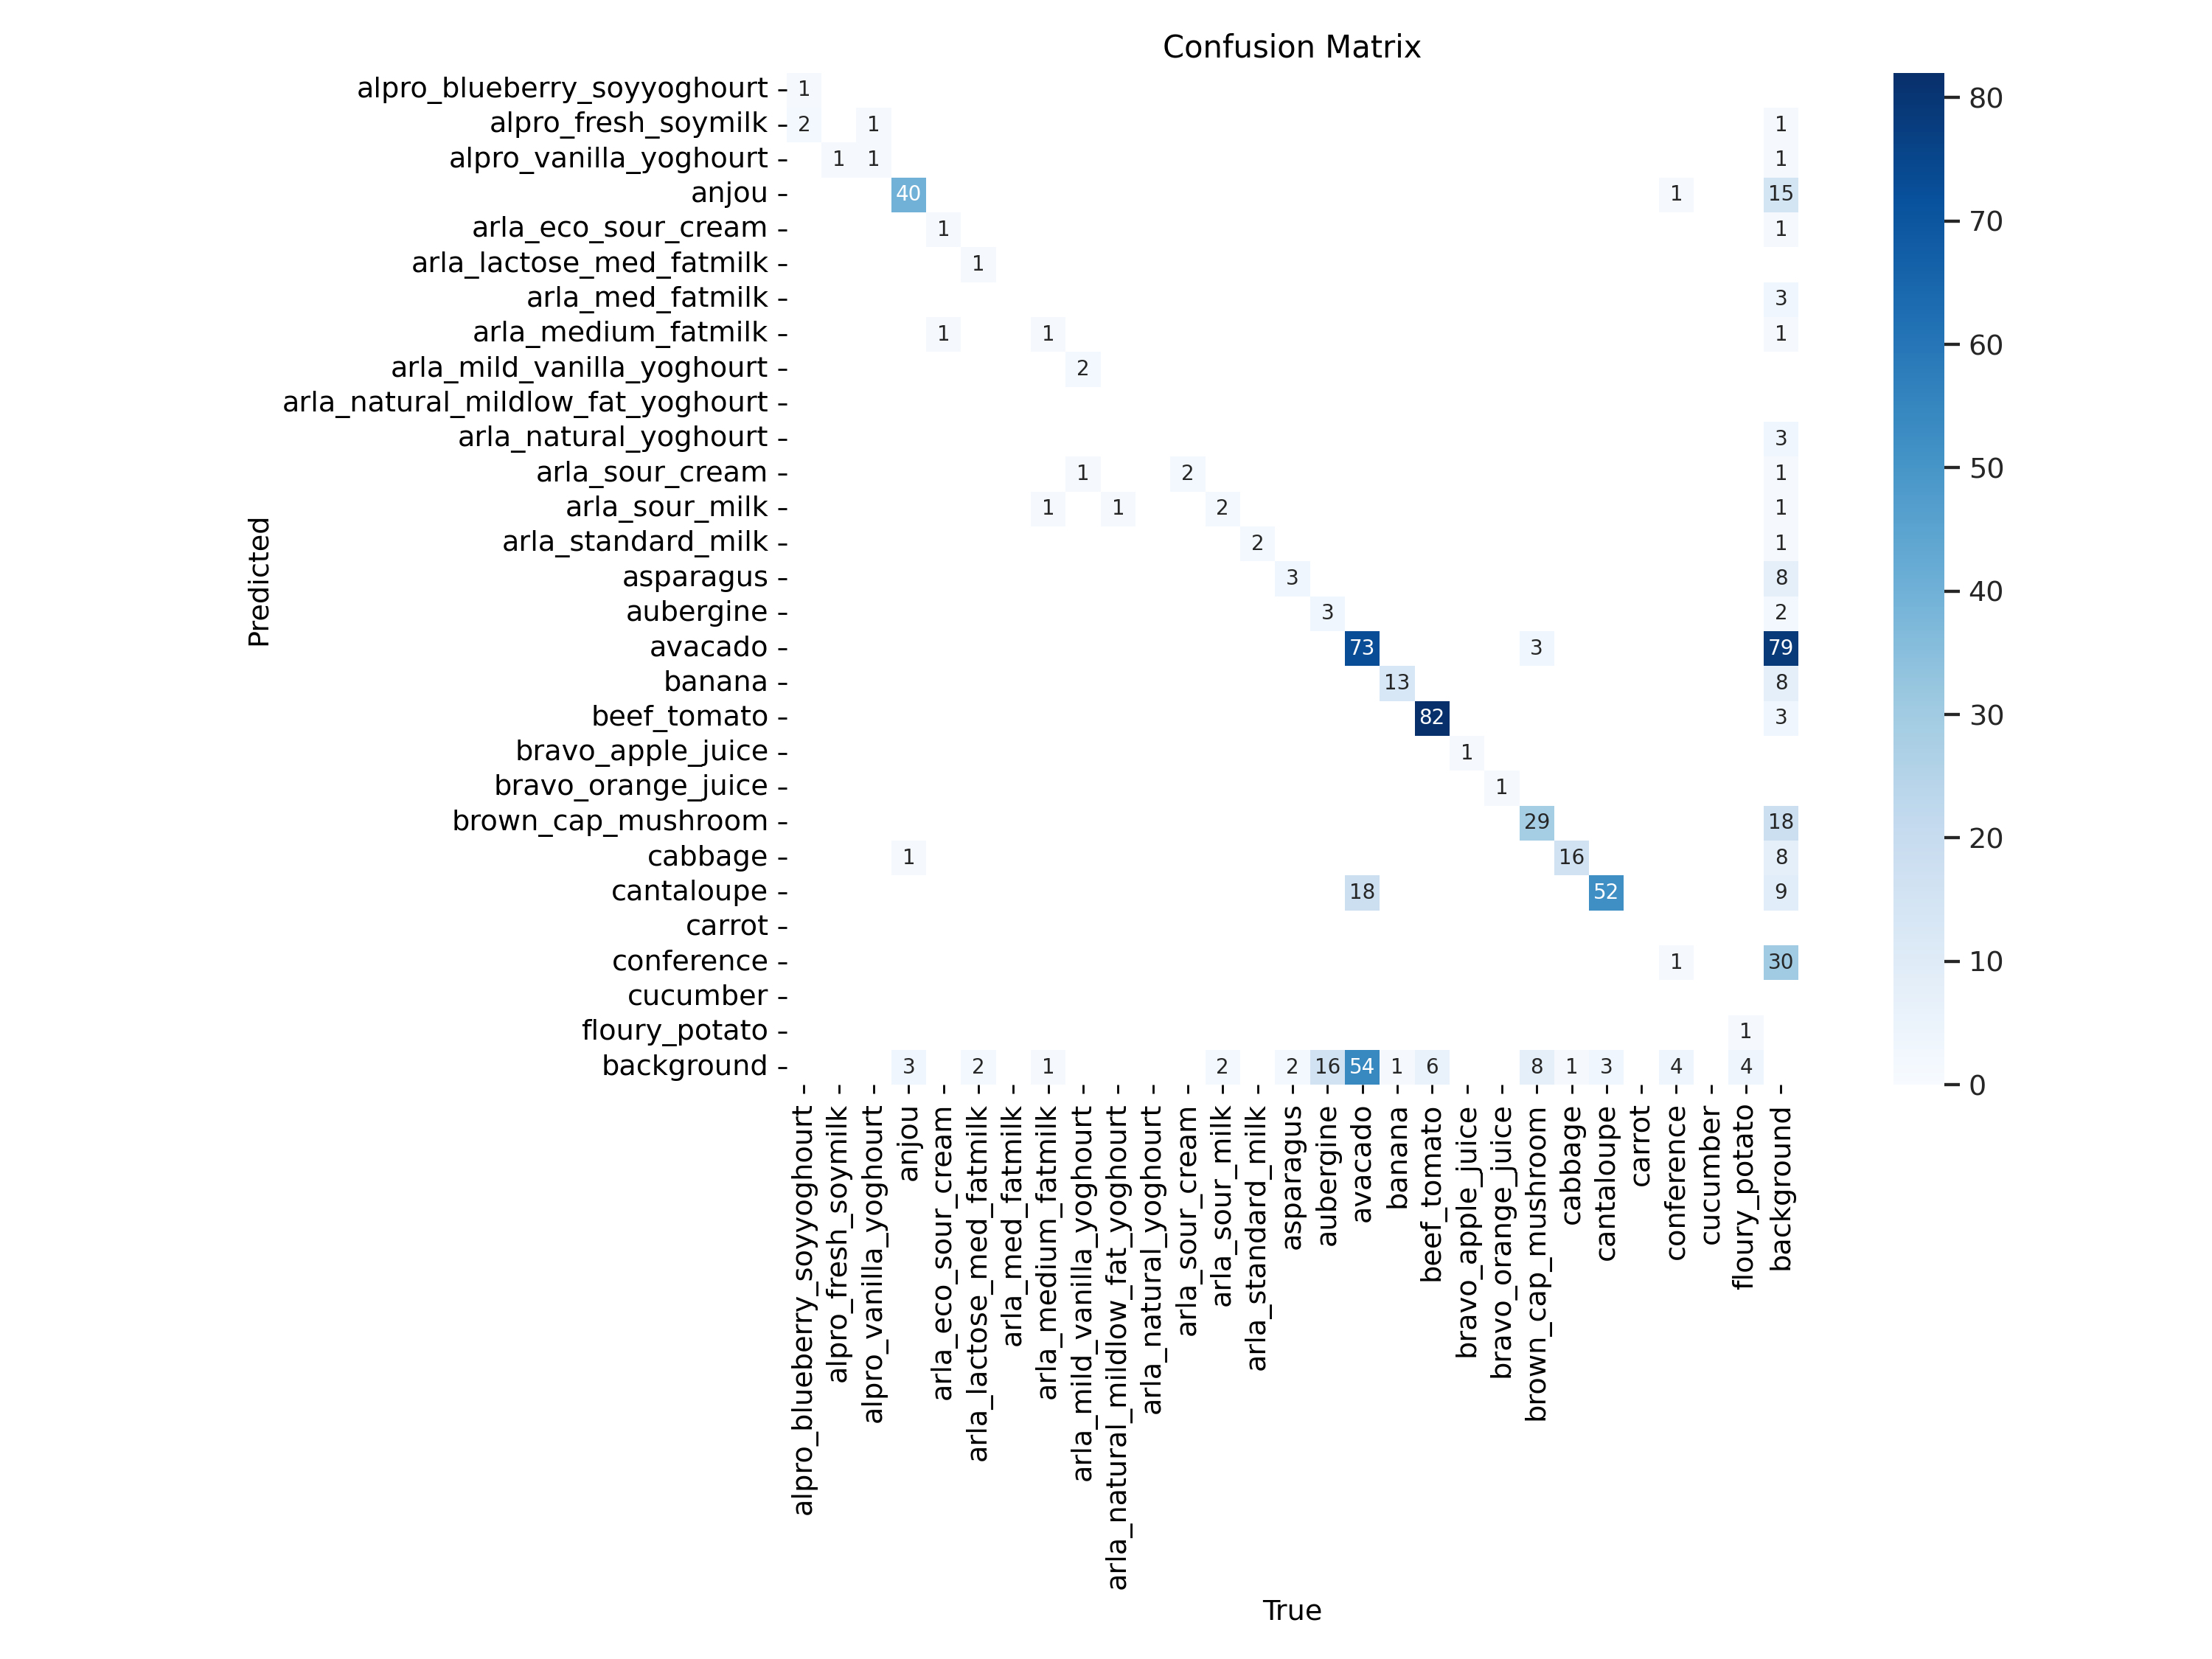

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/content


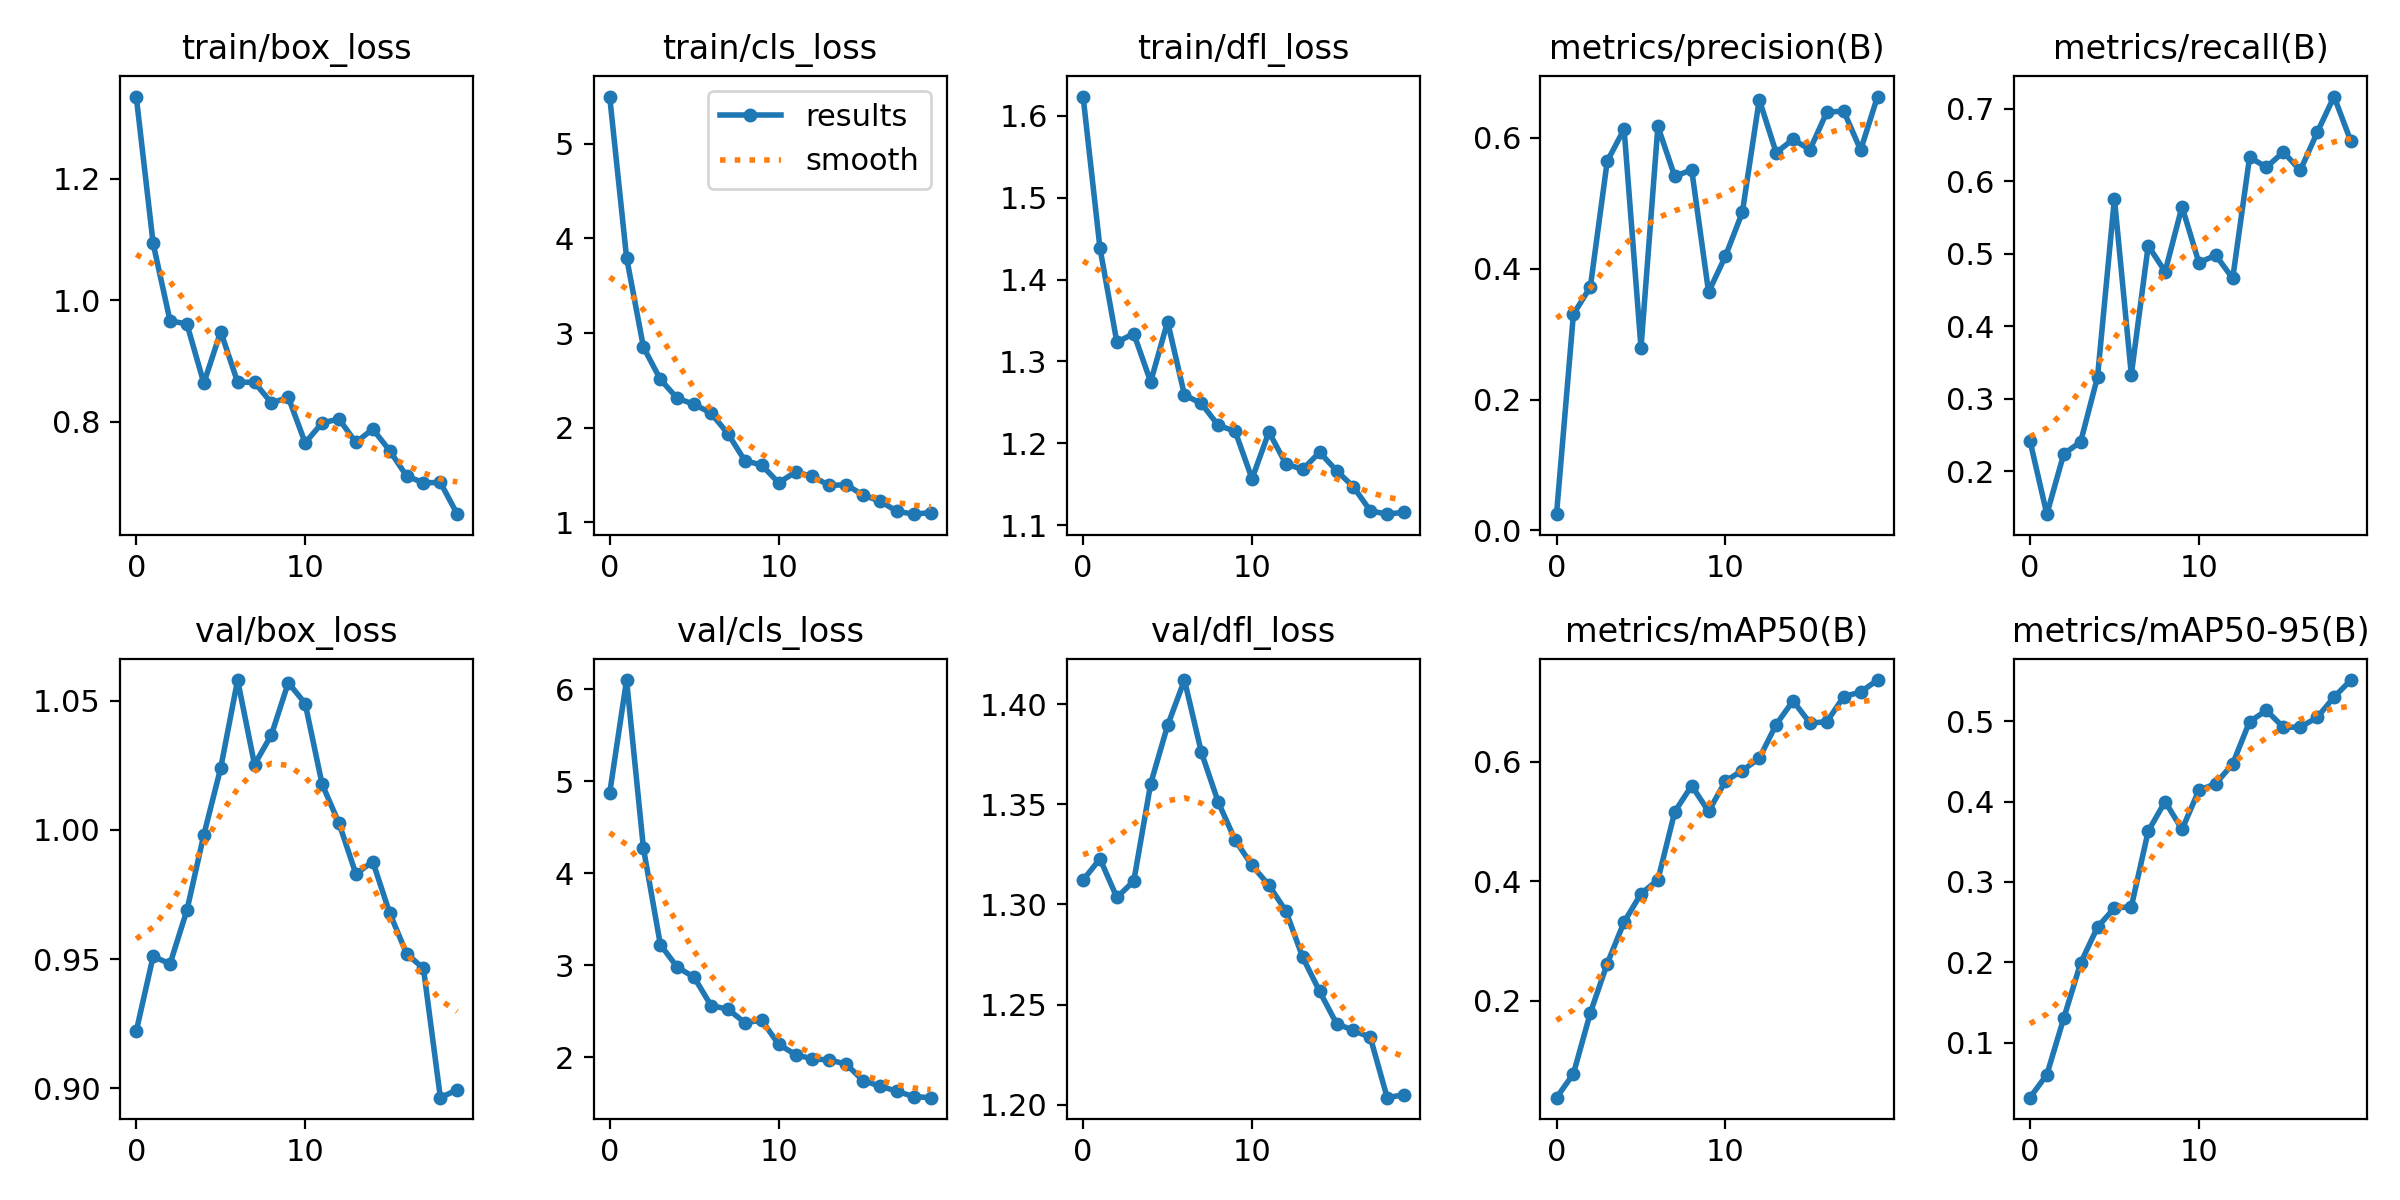

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Printing the first batch of validation set in order to see how our model draws the detected bounding box of an image and its class

/content


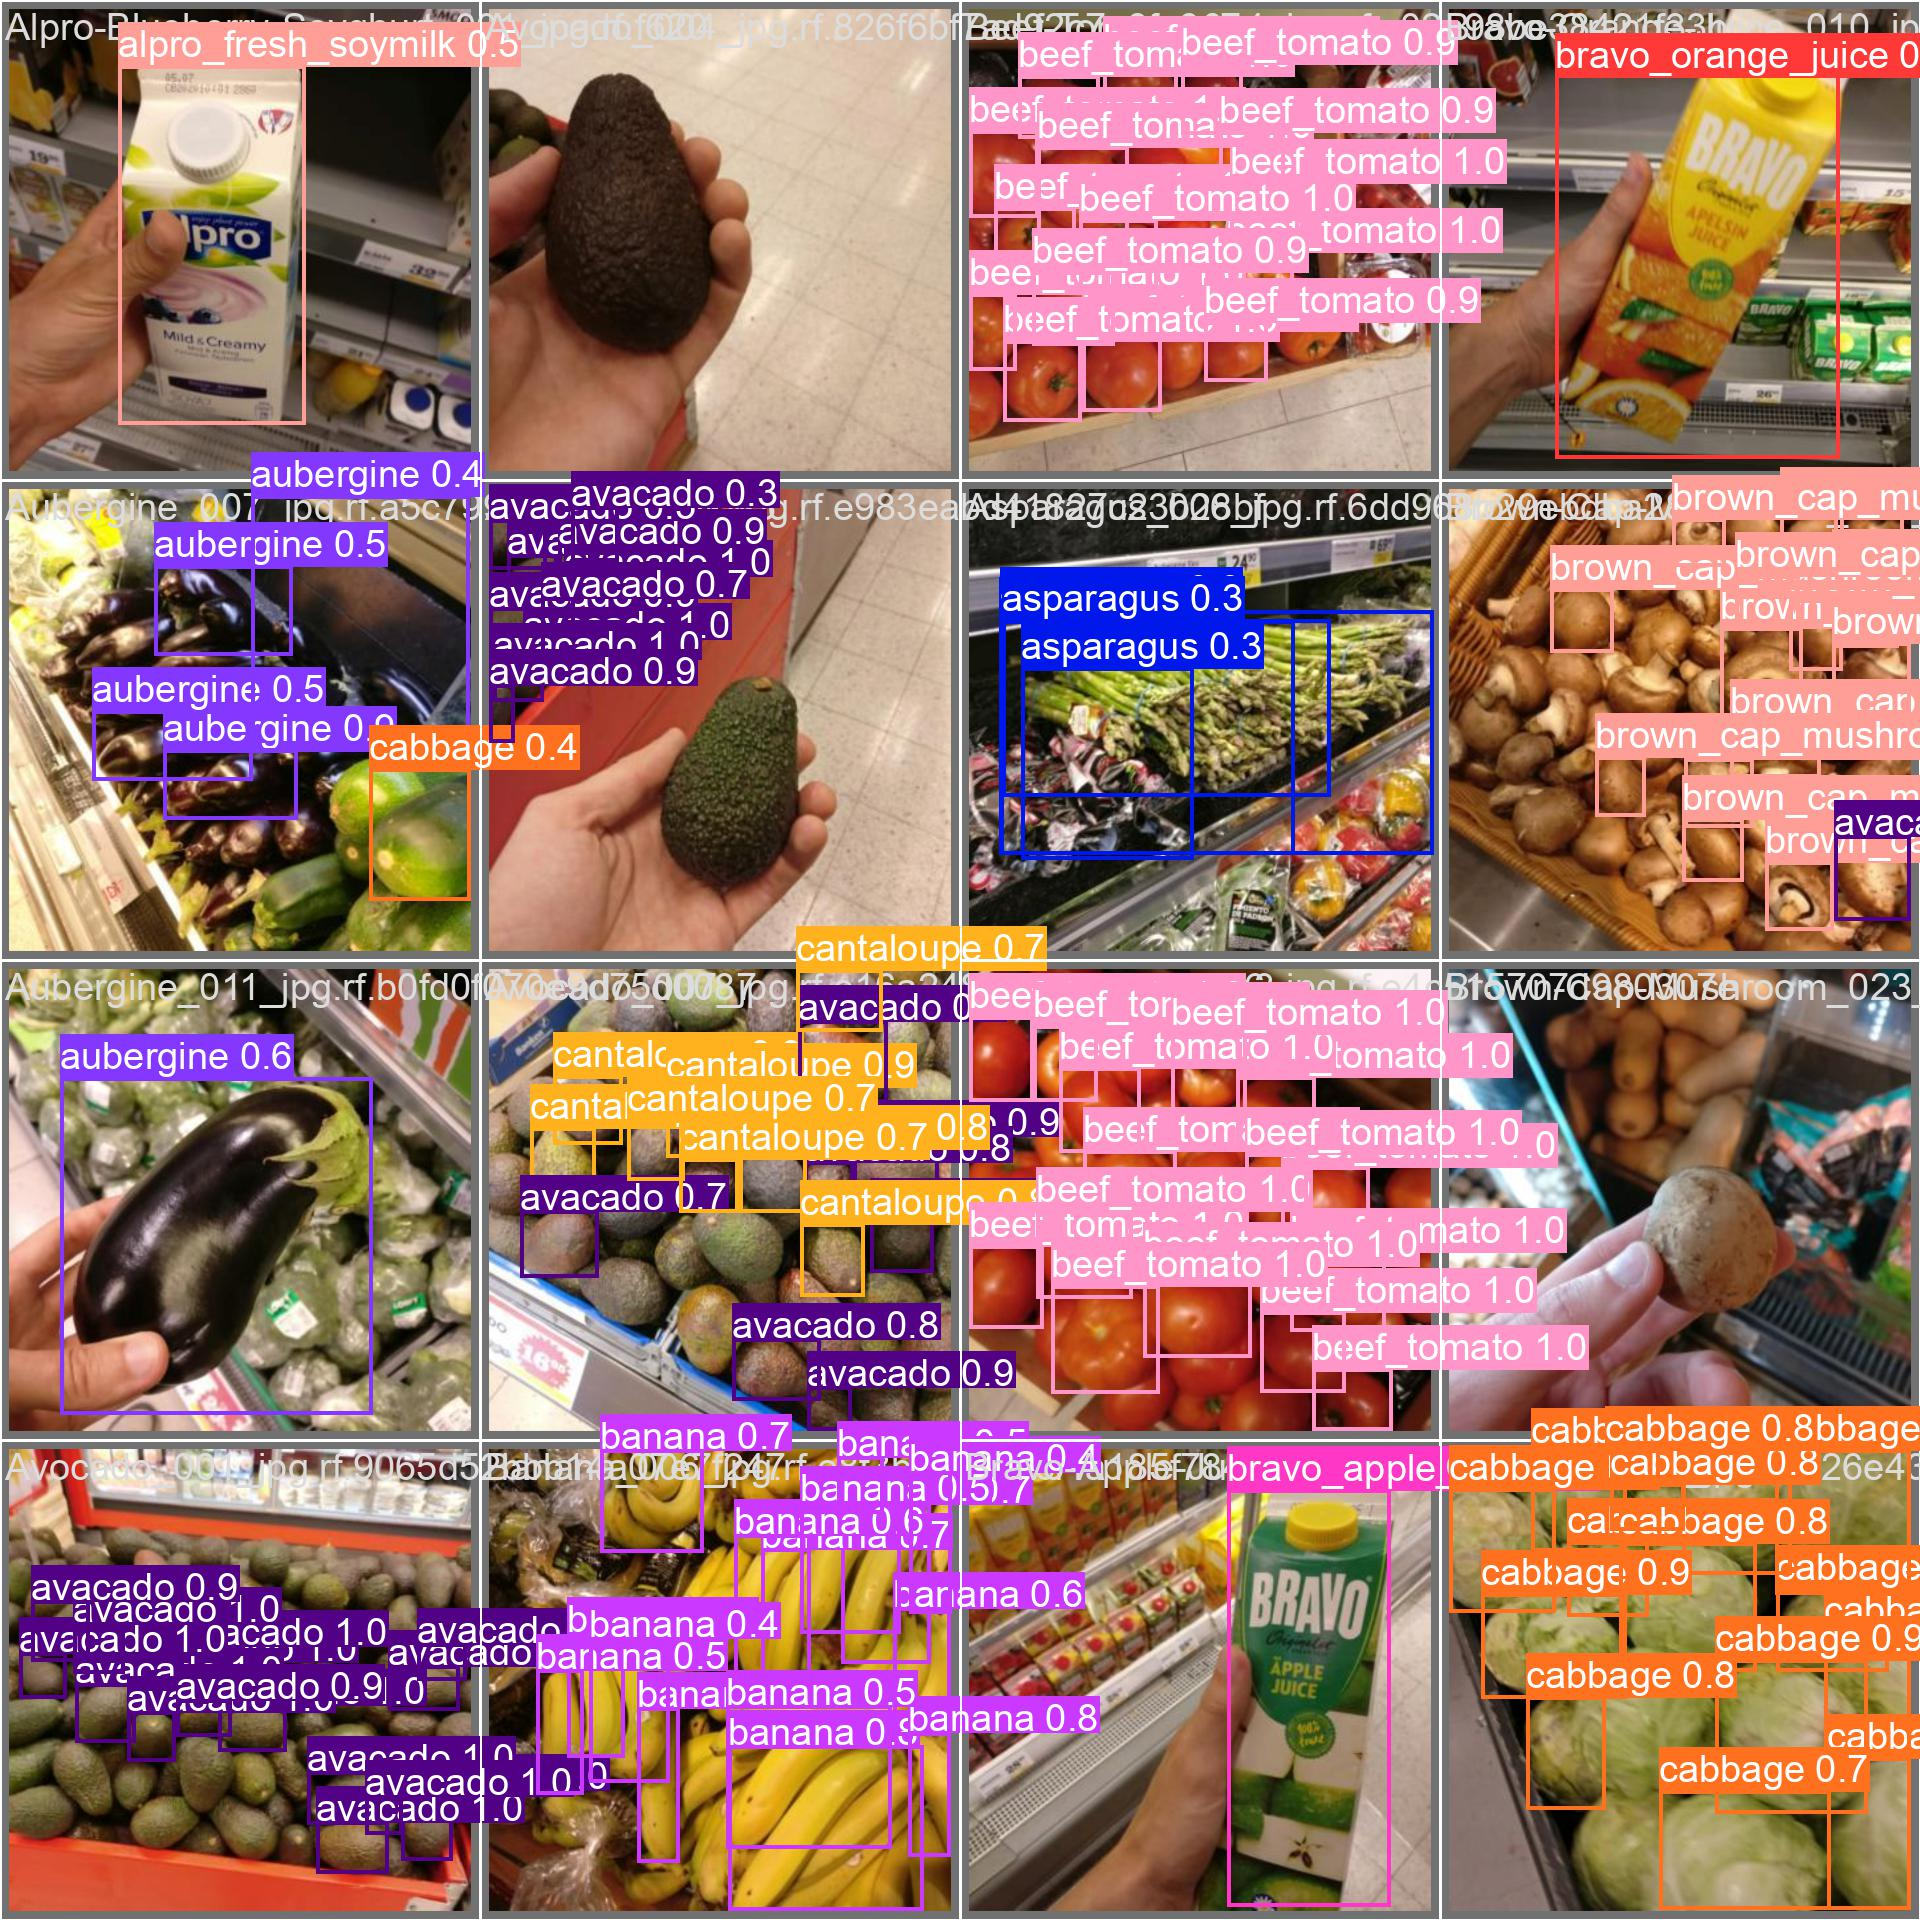

In [17]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Predicting image on the model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/Golden-Delicious_001.jpg' save=True

/content
Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11136420 parameters, 0 gradients

image 1/1 /content/Golden-Delicious_001.jpg: 800x800 3 beef_tomatos, 1 floury_potato, 24.9ms
Speed: 6.6ms preprocess, 24.9ms inference, 87.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
